## Import Required Libraries

In [43]:
# Data Handling & Preprocessing
import pandas as pd
import numpy as np
import scipy.stats as stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & Statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Loading and Inspecting the Dataset

In [44]:
# Load the dataset
file_path = "dataset for assignment 2.csv"
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Information:\n")
print(df.info())

# Show first few rows
print("\nFirst Few Rows:\n")
print(df.head())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  5000 non-null   int64 
 1   Gender                   5000 non-null   object
 2   Age                      5000 non-null   int64 
 3   Activity Level           5000 non-null   object
 4   Location                 5000 non-null   object
 5   App Sessions             5000 non-null   int64 
 6   Distance Travelled (km)  5000 non-null   int64 
 7   Calories Burned          5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB
None

First Few Rows:

   User ID  Gender  Age Activity Level  Location  App Sessions  \
0        1  Female   22         Active  Suburban           151   
1        2    Male   50         Active     Rural           157   
2        3    Male   36         Active     Urban           178   
3  

## Checking for Missing Values and Duplicates

In [45]:
# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Check for duplicate entries
print("\nDuplicate Entries:", df.duplicated().sum())


Missing Values:

User ID                    0
Gender                     0
Age                        0
Activity Level             0
Location                   0
App Sessions               0
Distance Travelled (km)    0
Calories Burned            0
dtype: int64

Duplicate Entries: 0


## Understanding Feature Characteristics

In [46]:
# Summary statistics for numerical columns
print("\nSummary Statistics:\n")
print(df.describe())


Summary Statistics:

           User ID          Age  App Sessions  Distance Travelled (km)  \
count  5000.000000  5000.000000   5000.000000              5000.000000   
mean   2500.500000    38.423600    124.366400                92.550400   
std    1443.520003    12.160631     42.689317                36.746095   
min       1.000000    18.000000     50.000000                26.000000   
25%    1250.750000    28.000000     89.000000                63.000000   
50%    2500.500000    39.000000    124.000000                89.000000   
75%    3750.250000    49.000000    161.000000               118.000000   
max    5000.000000    59.000000    199.000000               195.000000   

       Calories Burned  
count      5000.000000  
mean        432.316000  
std         187.427426  
min         102.000000  
25%         285.000000  
50%         406.000000  
75%         560.000000  
max         987.000000  


## Exploratory Data Analysis (EDA)

### 1. Visualizing Distributions of Numerical Features

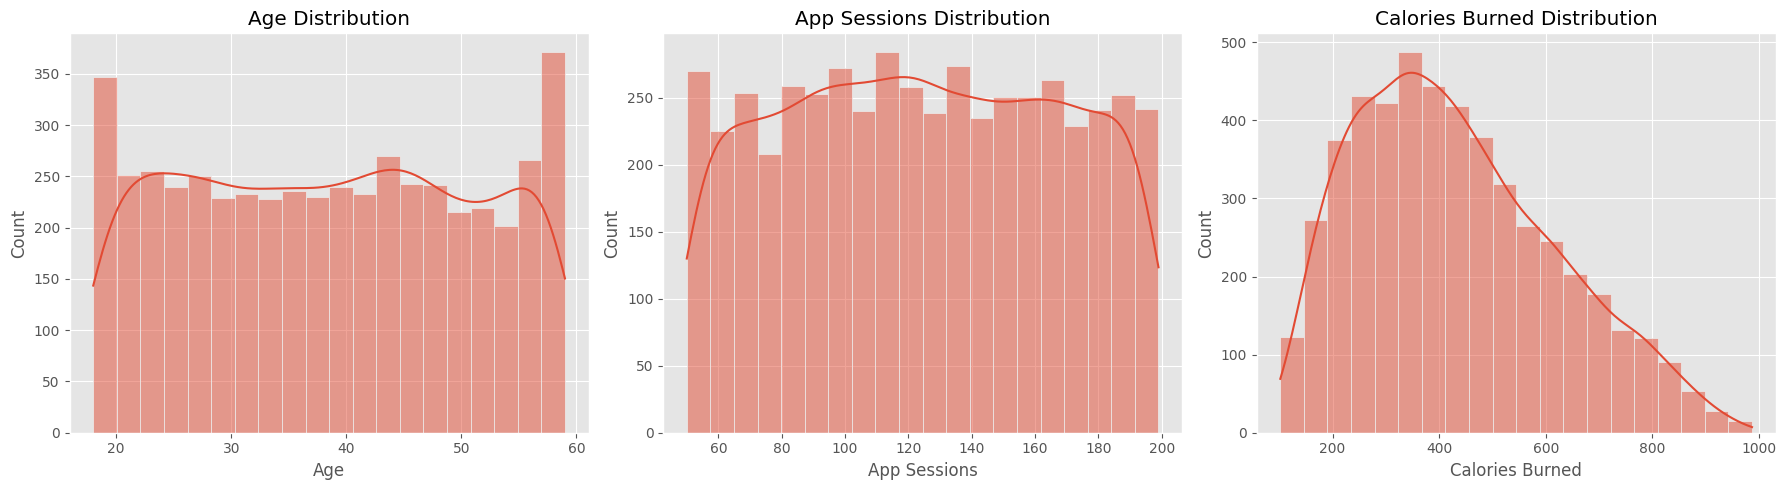

In [47]:
# Set style
plt.style.use("ggplot")

# Plot distributions of numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df["App Sessions"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("App Sessions Distribution")

sns.histplot(df["Calories Burned"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Calories Burned Distribution")

plt.tight_layout()
plt.show()

### 2. Analyzing User Engagement by Activity Level

/var/folders/gy/ghmwc6_x4vgg3f801kw6vx980000gn/T/ipykernel_77560/3632865049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Activity Level", y="App Sessions", data=df, palette="Set2")


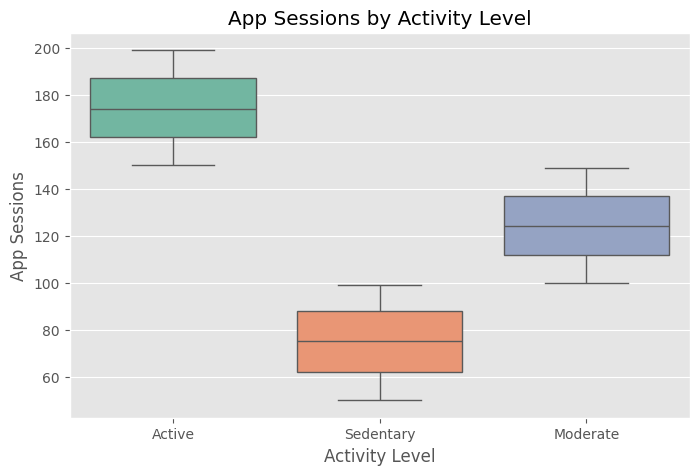

In [48]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Activity Level", y="App Sessions", data=df, palette="Set2")
plt.title("App Sessions by Activity Level")
plt.show()

### 3. Relationship Between Distance and Calories Burned

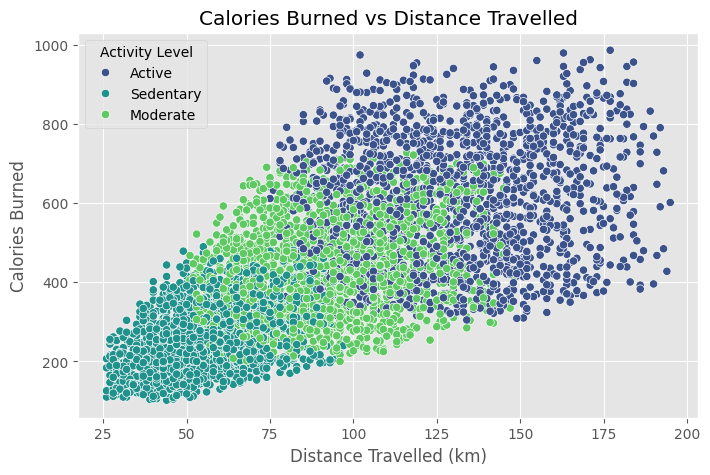

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Distance Travelled (km)"], y=df["Calories Burned"], hue=df["Activity Level"], palette="viridis")
plt.title("Calories Burned vs Distance Travelled")
plt.show()

### 4. Correlation Analysis

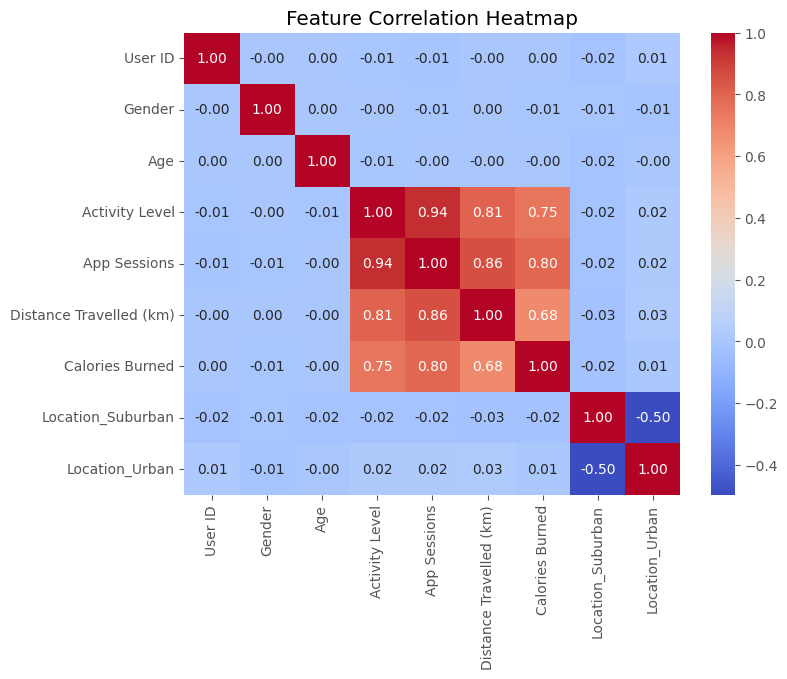

In [50]:
# Encode Gender (Nominal)
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])  # Female = 0, Male = 1

# Encode Activity Level (Ordinal)
activity_mapping = {"Sedentary": 0, "Moderate": 1, "Active": 2}
df["Activity Level"] = df["Activity Level"].map(activity_mapping)

# Apply One-Hot Encoding for Location (Nominal)
df = pd.get_dummies(df, columns=["Location"], drop_first=True)

# Now compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Regression Analysis – Predicting Calories Burned

In [51]:
# Select Features and Target Variable
X = df[["Distance Travelled (km)", "App Sessions"]]
y = df["Calories Burned"]

# Split Data into Training (80%) and Testing (20%) Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions on Test Data
y_pred = model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

# Print Results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 93.29
Root Mean Squared Error (RMSE): 114.20
R² Score: 0.64


### Actual vs. Predicted Calories Burned

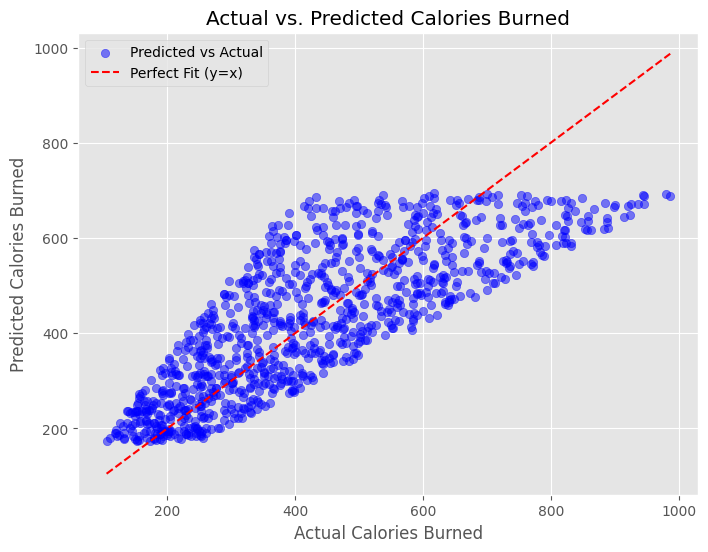

In [52]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit (y=x)")
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs. Predicted Calories Burned")
plt.legend()
plt.show()

### Residual Plot

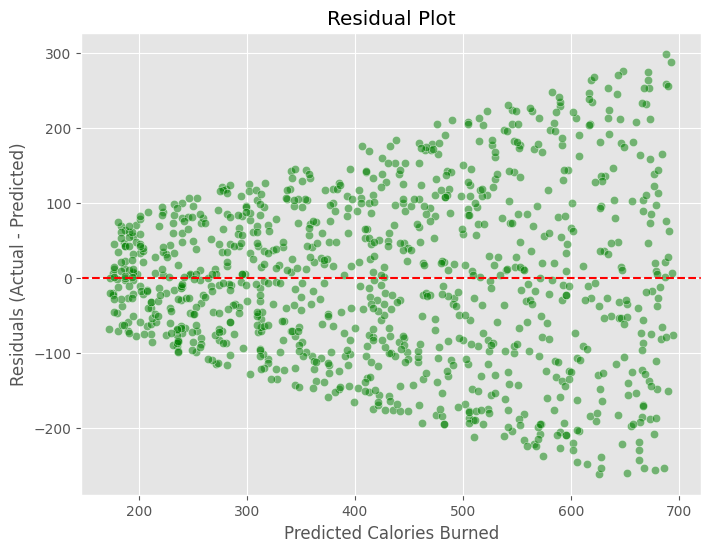

In [53]:
# Compute residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Calories Burned")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

## User Segmentation Using Clustering

### 1. Select Features for Clustering

In [54]:
# Select relevant features for clustering
X = df[["Distance Travelled (km)", "App Sessions", "Calories Burned"]]

# Standardize features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 2. Determine the Optimal Number of Clusters (Elbow Method)

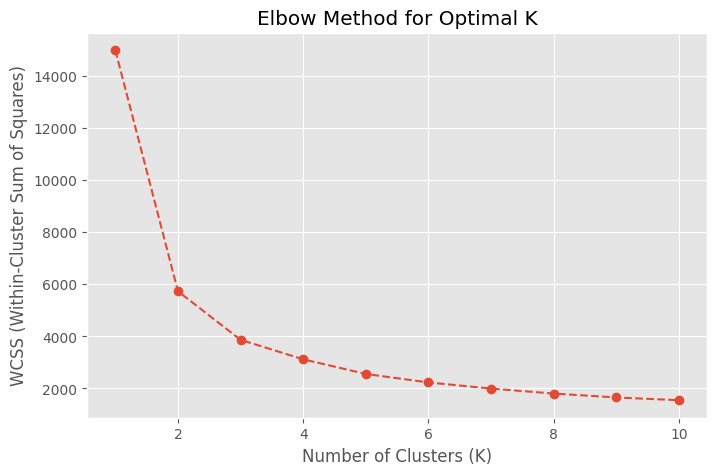

In [55]:
# Compute inertia for different K values
wcss = []
K_range = range(1, 11)  # Trying K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia measures cluster tightness

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

### 3. Apply K-Means Clustering

In [56]:
# Choose optimal K based on the elbow curve
optimal_k = 3  # Adjust based on elbow point

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)  # Assign cluster labels

### 4. Visualize Clusters

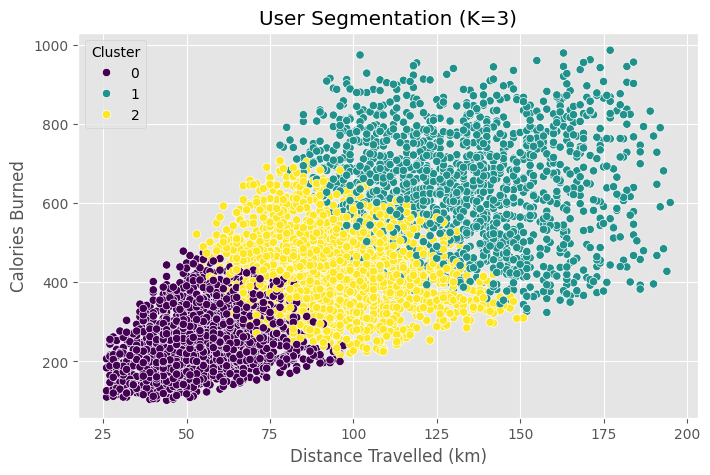

In [57]:
# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Distance Travelled (km)"], y=df["Calories Burned"], hue=df["Cluster"], palette="viridis")
plt.xlabel("Distance Travelled (km)")
plt.ylabel("Calories Burned")
plt.title(f"User Segmentation (K={optimal_k})")
plt.legend(title="Cluster")
plt.show()

### 5. Silhouette Score Evaluation of K-Means Clustering

In [60]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score for K-Means clustering
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)  # X_scaled is your scaled feature set

# Print the result
print(f"Silhouette Score for K-Means Clustering: {silhouette_avg:.4f}")

Silhouette Score for K-Means Clustering: 0.3982


## Cultural Relevance in Data Analysis

### 1. Analyze Demographic Distributions

/var/folders/gy/ghmwc6_x4vgg3f801kw6vx980000gn/T/ipykernel_77560/1064499456.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Location_Urban", y="Distance Travelled (km)", palette="Set2", ax=axes[2])


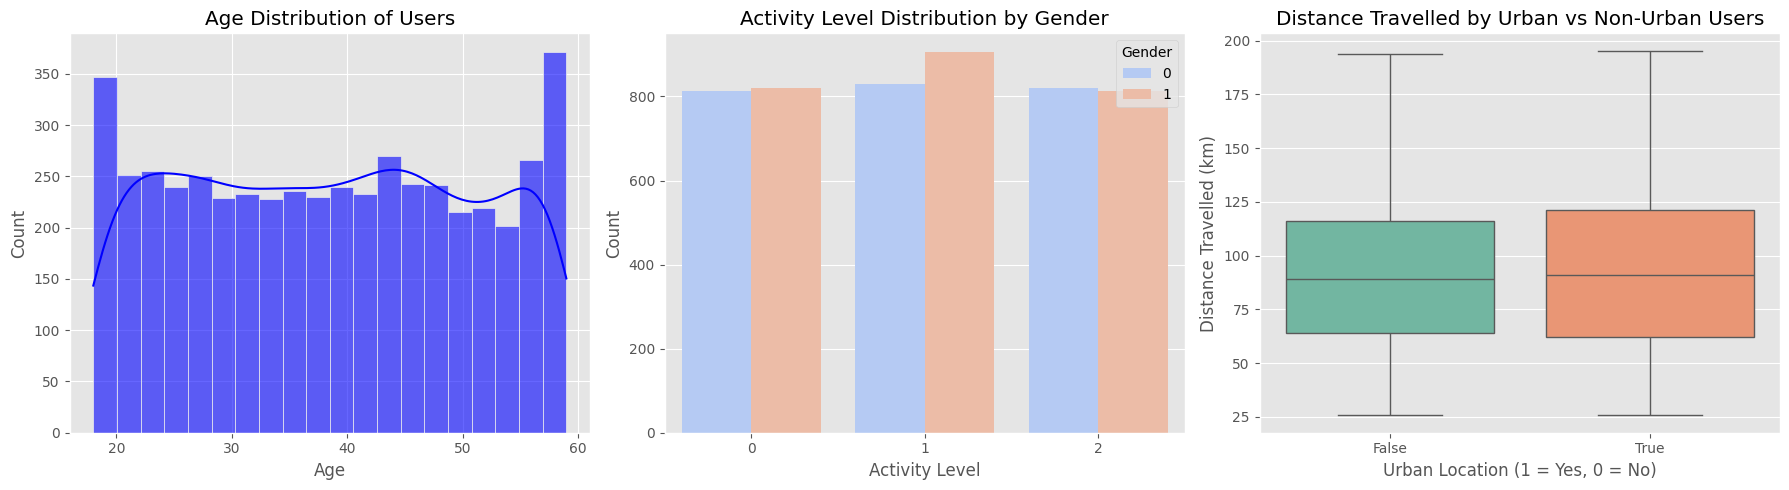

In [58]:
# Set visualization style
plt.style.use("ggplot")

# Create a single figure with subplots for all three graphs
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Age Distribution
sns.histplot(df["Age"], bins=20, kde=True, color="blue", alpha=0.6, ax=axes[0])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")
axes[0].set_title("Age Distribution of Users")

# 2. Activity Level Distribution by Gender
sns.countplot(data=df, x="Activity Level", hue="Gender", palette="coolwarm", ax=axes[1])
axes[1].set_xlabel("Activity Level")
axes[1].set_ylabel("Count")
axes[1].set_title("Activity Level Distribution by Gender")
axes[1].legend(title="Gender")

# 3. Distance Travelled by Location
sns.boxplot(data=df, x="Location_Urban", y="Distance Travelled (km)", palette="Set2", ax=axes[2])
axes[2].set_xlabel("Urban Location (1 = Yes, 0 = No)")
axes[2].set_ylabel("Distance Travelled (km)")
axes[2].set_title("Distance Travelled by Urban vs Non-Urban Users")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 2. Statistical Analysis

In [59]:
# 1. Correlation between Age and Engagement
correlation_age_sessions = stats.pearsonr(df["Age"], df["App Sessions"])
correlation_age_distance = stats.pearsonr(df["Age"], df["Distance Travelled (km)"])

# 2. Statistical Test: Urban vs Non-Urban Users (Mann-Whitney U Test)
urban_distance = df[df["Location_Urban"] == 1]["Distance Travelled (km)"]
non_urban_distance = df[df["Location_Urban"] == 0]["Distance Travelled (km)"]
stat, p_value = stats.mannwhitneyu(urban_distance, non_urban_distance)

# Print results
print(f"Age vs App Sessions Correlation: {correlation_age_sessions[0]:.2f} (p-value: {correlation_age_sessions[1]:.4f})")
print(f"Age vs Distance Travelled Correlation: {correlation_age_distance[0]:.2f} (p-value: {correlation_age_distance[1]:.4f})")
print(f"Mann-Whitney U Test (Urban vs Non-Urban Distance Travelled): p-value = {p_value:.4f}")

Age vs App Sessions Correlation: -0.00 (p-value: 0.9033)
Age vs Distance Travelled Correlation: -0.00 (p-value: 0.7918)
Mann-Whitney U Test (Urban vs Non-Urban Distance Travelled): p-value = 0.1242
